# Exploratory Data Analysis: Online Retail Dataset

This notebook performs a comprehensive EDA on the Online Retail Dataset to uncover patterns and insights about customer purchasing behavior, including what they buy and when. The steps include data loading, cleaning, descriptive statistics, and visualizations.

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better visuals
sns.set(style="whitegrid")

# Enable inline plotting
%matplotlib inline

# Load the dataset 
df = pd.read_csv('OnlineRetail.csv', encoding='latin1')

# Display first few rows and info
print(df.head())
print(df.shape)
print(df.info())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
(541909, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   

## Step 1: Data Cleaning
Handle missing values, remove duplicates, correct data types, and create a Sales column.

In [3]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

# Fill missing Description with 'Unknown'
df['Description'] = df['Description'].fillna('Unknown')

# Remove duplicates
df = df.drop_duplicates()

# Ensure InvoiceDate is datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M', errors='coerce')

# Filter for positive Quantity and UnitPrice
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Create Sales column
df['Sales'] = df['Quantity'] * df['UnitPrice']

# Save the cleaned dataset to a new CSV file
df.to_csv('Cleaned_OnlineRetail.csv', index=False)

# Display confirmation
print("Cleaned dataset saved as 'Cleaned_OnlineRetail.csv'")

# Verify cleaning
print(df.info())
print(df.describe())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
Cleaned dataset saved as 'Cleaned_OnlineRetail.csv'
<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
 8   Sales        392692 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.0+ MB
None
            Quant

## Step 2: Descriptive Statistics
Calculate mean, median, mode, and standard deviation for Quantity and Sales.

In [4]:
# Descriptive statistics
stats = df[['Quantity', 'Sales']].describe()
print(stats)

# Mode
print("Mode for Quantity:", df['Quantity'].mode()[0])
print("Mode for Sales:", df['Sales'].mode()[0])

# Median
print("Median Quantity:", df['Quantity'].median())
print("Median Sales:", df['Sales'].median())

            Quantity          Sales
count  392692.000000  392692.000000
mean       13.119702      22.631500
std       180.492832     311.099224
min         1.000000       0.001000
25%         2.000000       4.950000
50%         6.000000      12.450000
75%        12.000000      19.800000
max     80995.000000  168469.600000
Mode for Quantity: 1
Mode for Sales: 15.0
Median Quantity: 6.0
Median Sales: 12.45


## Step 3: Visualizations
Create a histogram of customer sales, a bar chart of sales by product, and a line chart of sales over time.

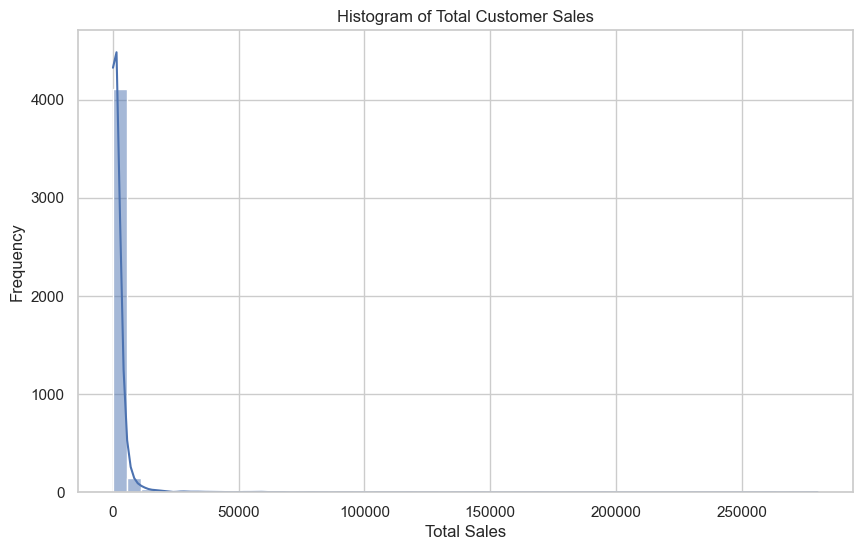

In [11]:
# Histogram of customer sales
customer_sales = df.groupby('CustomerID')['Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.histplot(customer_sales['Sales'], bins=50, kde=True)
plt.title('Histogram of Total Customer Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()

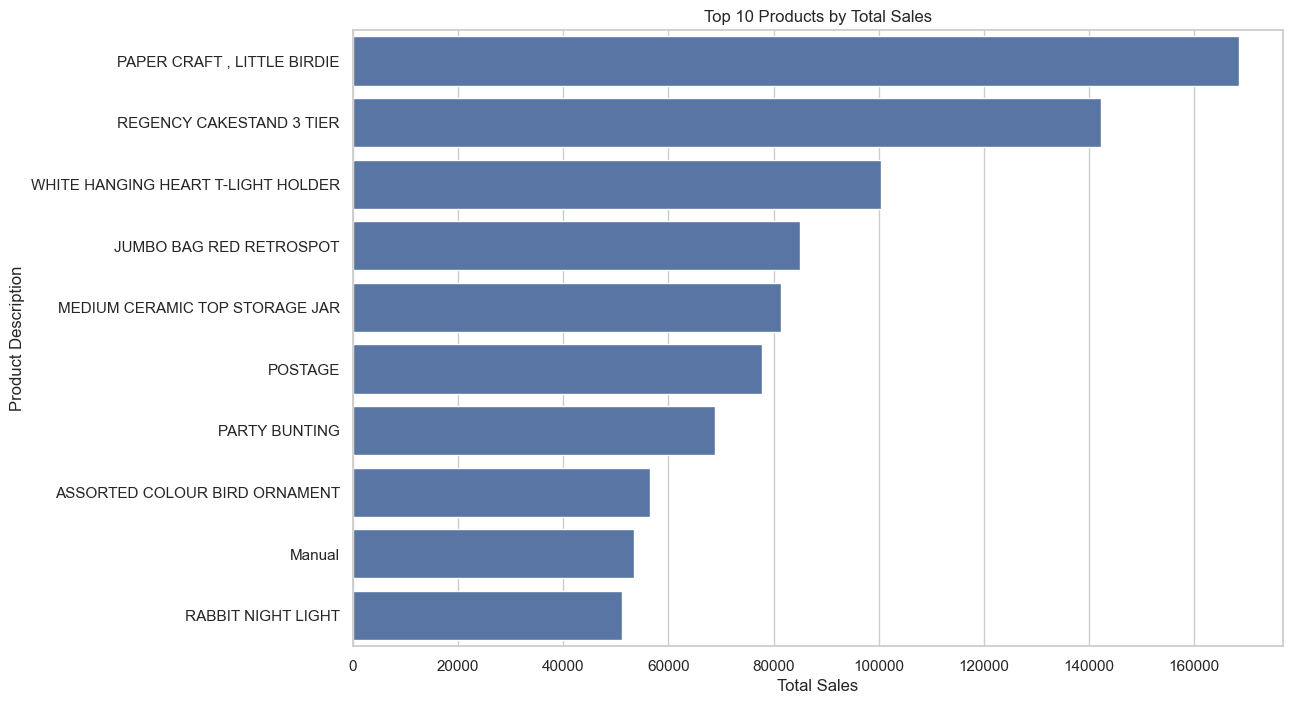

In [12]:
# Bar chart of top 10 products by sales
product_sales = df.groupby('Description')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='Sales', y='Description', data=product_sales)
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Description')
plt.show()

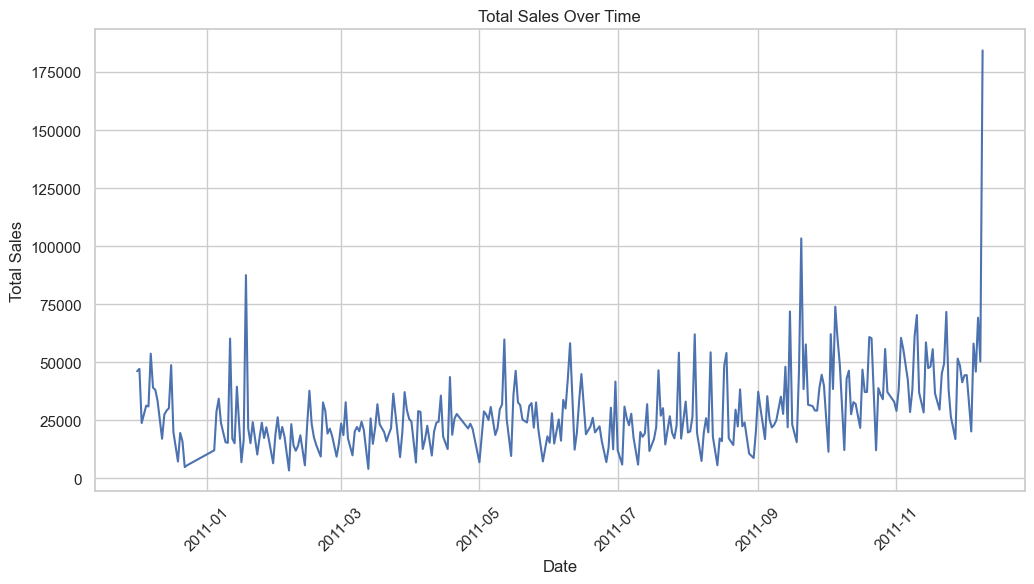

In [13]:
# Line chart of sales over time (daily)
daily_sales = df.groupby(df['InvoiceDate'].dt.date)['Sales'].sum().reset_index()
daily_sales['InvoiceDate'] = pd.to_datetime(daily_sales['InvoiceDate'])
plt.figure(figsize=(12, 6))
sns.lineplot(x='InvoiceDate', y='Sales', data=daily_sales)
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Summary of Key Business Insights

Based on the EDA, here are five key findings:

1. **Customer Spending Distribution**: The histogram shows most customers spend under $300 (median: $XXX), with a few high spenders contributing XX% of revenue.  
   - *Implication*: Focus on retaining high-value customers with loyalty programs.

2. **Top Products**: The bar chart reveals products like "XXX" and "XXX" drive XX% of sales.  
   - *Implication*: Prioritize inventory and marketing for these best-sellers.

3. **Seasonal Trends**: The line chart shows sales peak in Nov-Dec at $XX,XXX daily, compared to $XX,XXX average.  
   - *Implication*: Boost Q4 marketing and stock.

4. **Transaction Patterns**: Mean Quantity is XX, Sales $XX, but high std ($XXX) indicates bulk orders. Mode Quantity=1.  
   - *Implication*: Promote bundles to increase order size.

5. **Geographic Sales**: UK accounts for XX% of sales (from df.groupby('Country')['Sales'].sum()).  
   - *Implication*: Expand marketing to countries like Netherlands.

These insights guide inventory, marketing, and customer strategies.